### Bank Note Authentication

## Description:Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels.

In [186]:
# import liabraries
import pandas as pd
import numpy as np

In [187]:
#check directory
import os
os.getcwd()

'C:\\Users\\HP'

# load dataset


In [188]:
bank=pd.read_csv('C:\\Users\\HP\\BankNote_Authentication.csv')

### In dataset have four features numerical variables and one dependent categorical variable

In [189]:
bank.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [190]:
# see unique values in class check how many category are there so we got here 0 and 1
bank['class'].unique()

array([0, 1], dtype=int64)

In [191]:
# check central tendency and variance of data
bank.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## check data types of all varibles 

In [192]:
#check datatypes of datasets
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## Cleaning Data

## Check missing Values

In [193]:
# check missing values in data , so found out zero missing values in dataset
bank.isnull().sum()


variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [194]:
features=bank[['variance','skewness','curtosis','entropy']]
features.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


## check outliers in data

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

F:\Anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


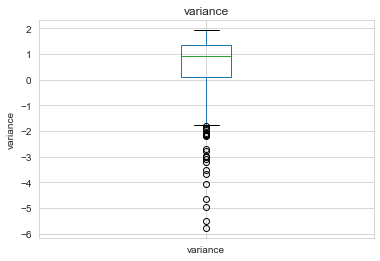

F:\Anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


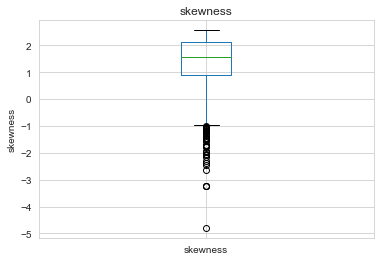

F:\Anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


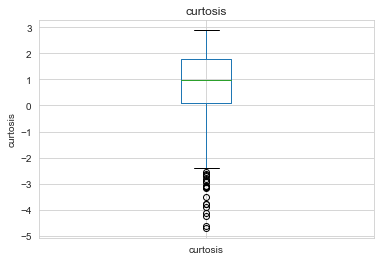

F:\Anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


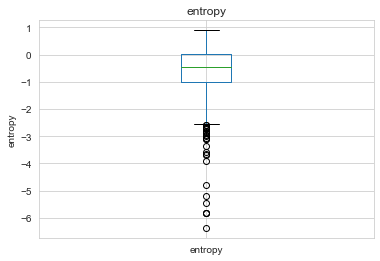

In [196]:
for feature in features:
    bank=bank.copy()
    if 0 in bank[feature].unique():
        pass
    else:
        bank[feature]=np.log(bank[feature])
        bank.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

## Data Exploratory Analysis

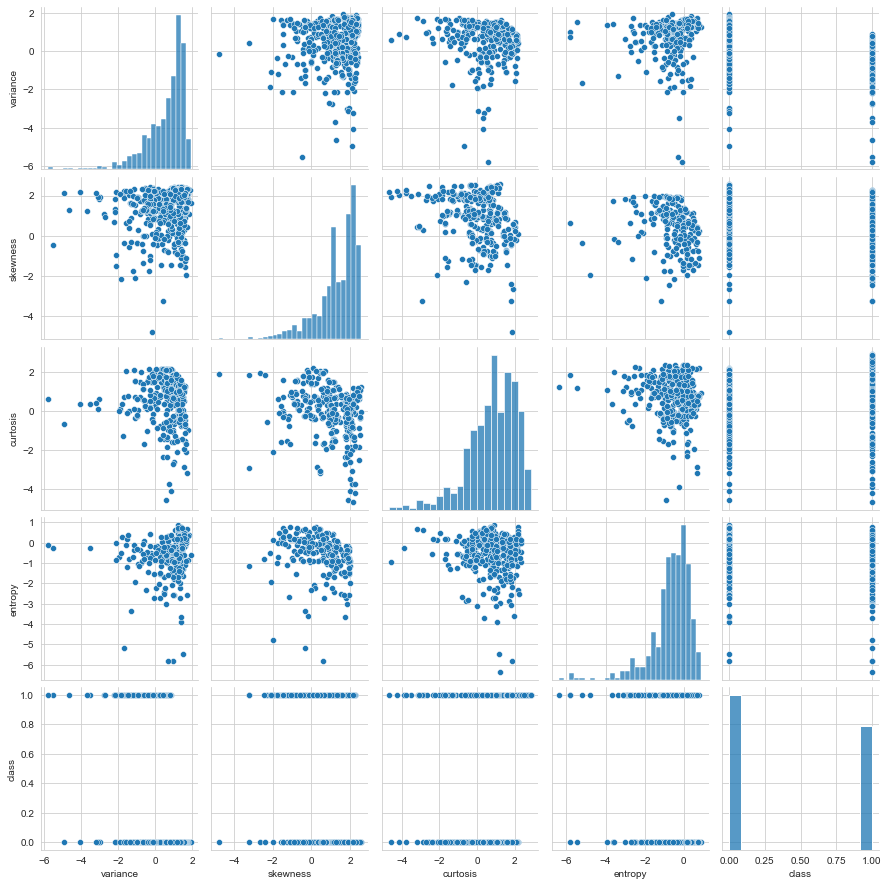

In [197]:
# check distribution of data
sns.pairplot(bank)

<AxesSubplot:xlabel='class', ylabel='count'>

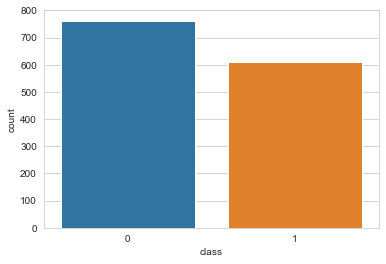

In [198]:
## According to the countplot 0 class have 750 count and 1 have 600 count so we have balance data
sns.set_style('whitegrid')
sns.countplot(x='class',data=bank)

## from above count plot we understand more bank note are faulty than true bank notes

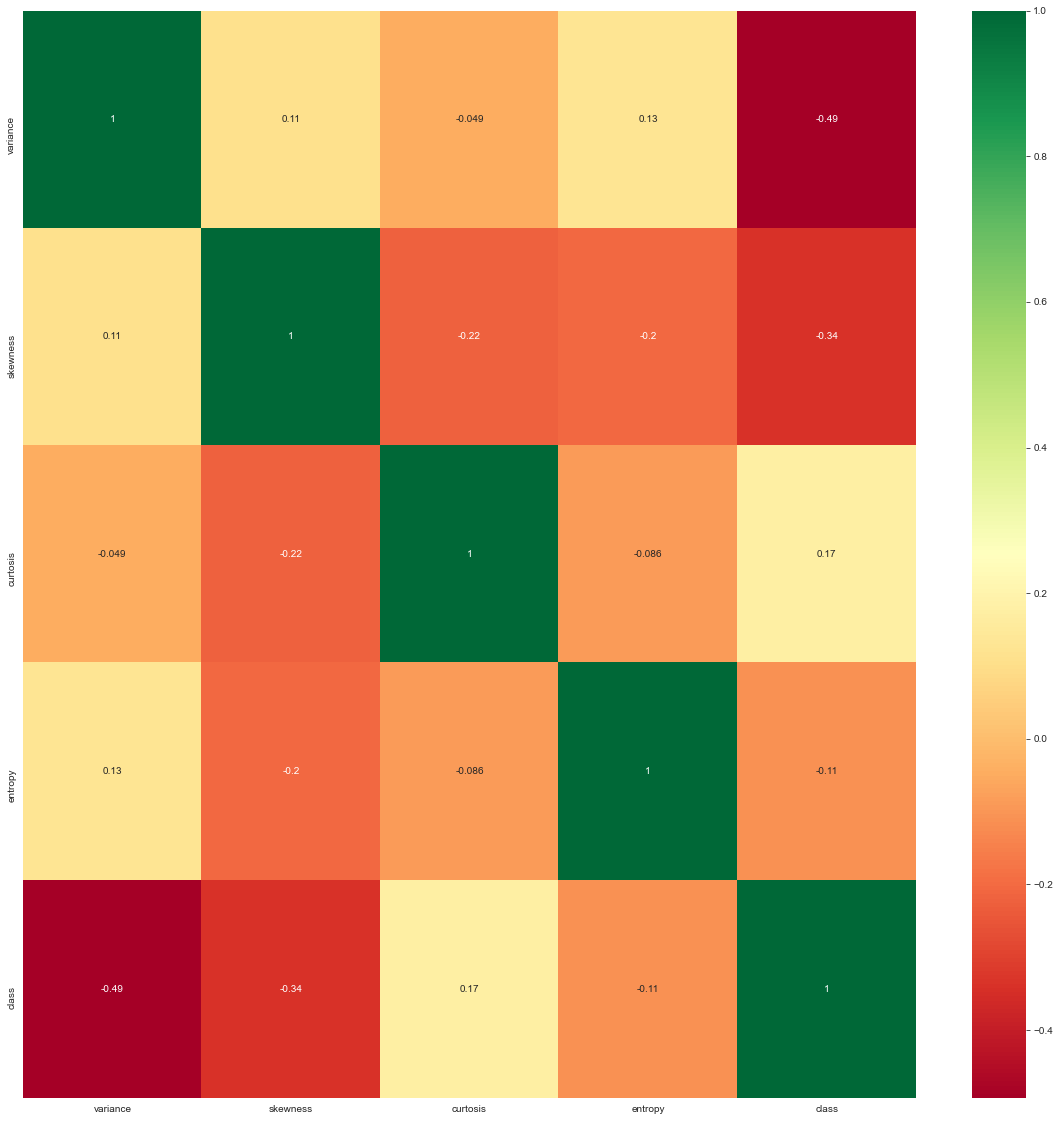

In [199]:
#check correlations of each features in bank data
# from coorrelation we understand no one feature highly correlated to each other
corr = bank.corr()
top_corr_features = corr.index
plt.figure(figsize=(20,20))
#plot heat map using seaborn
g=sns.heatmap(bank[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Data distribution

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='curtosis'>

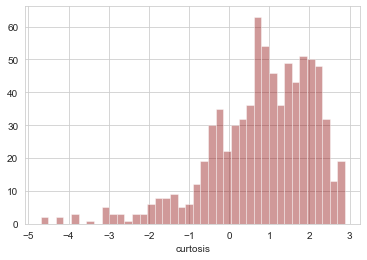

In [200]:
sns.distplot(bank['curtosis'],kde=False,color='darkred',bins=40)


<AxesSubplot:xlabel='skewness'>

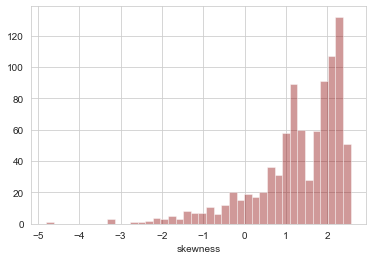

In [201]:
sns.distplot(bank['skewness'],kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='entropy'>

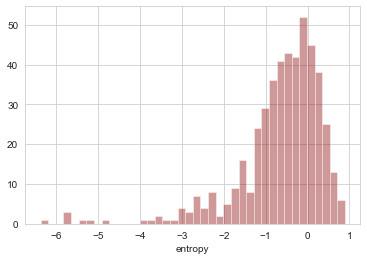

In [202]:
sns.distplot(bank['entropy'],kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='variance'>

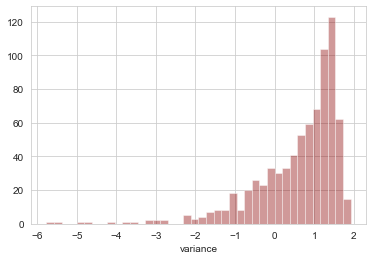

In [203]:
sns.distplot(bank['variance'],kde=False,color='darkred',bins=40)

## all data features are left-skewed
central tendency shift to left side

## Removing Outliers

<AxesSubplot:xlabel='curtosis'>

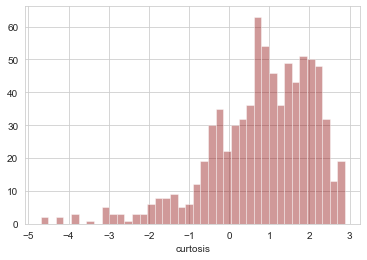

In [204]:
sns.distplot(bank['curtosis'],kde=False,color='darkred',bins=40)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='curtosis'>

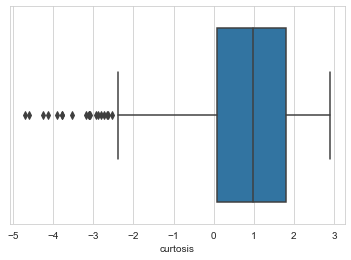

In [205]:
sns.boxplot(bank['curtosis'])

In [206]:
## curtosis have outliers
#### Lets compute the Interquantile range to calculate the boundaries
IQR=bank.curtosis.quantile(0.75)-bank.curtosis.quantile(0.25)
IQR

1.6973622927614749

In [207]:
#### Extreme outliers
lower_bridge=bank['curtosis'].quantile(0.25)-(IQR*3)
upper_bridge=bank['curtosis'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-4.998666283436218
6.882869765894107


(None, None)

In [208]:
## removing outliers using lower_bridge, we place lower_bridge in place all outliers
bank.loc[bank['curtosis']<=-4.998666283436218,'curtosis']=-4.998666283436218

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='skewness'>

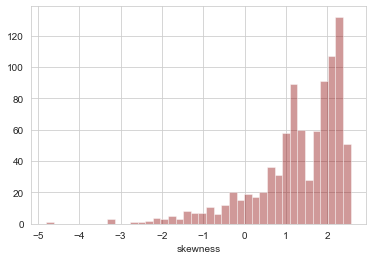

In [209]:
## plot distplot for skewness

sns.distplot(bank['skewness'],kde=False,color='darkred',bins=40)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='skewness'>

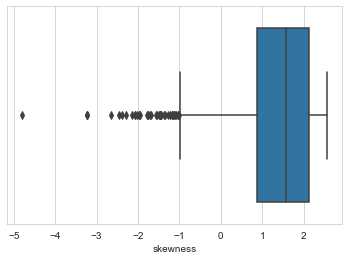

In [210]:
sns.boxplot(bank['skewness'])

In [211]:
## Inter quartile range for skewness
IQR1=bank.skewness.quantile(0.75)-bank.skewness.quantile(0.25)
IQR1

1.240655598558488

In [212]:
#### Extreme outliers
lower_bridge=bank['skewness'].quantile(0.25)-(IQR1*3)
upper_bridge=bank['skewness'].quantile(0.75)+(IQR1*3)
print(lower_bridge), print(upper_bridge)

-2.8429007332846035
5.841688456624812


(None, None)

In [214]:
## removing outliers using lower_bridge, we place lower_bridge in place all outliers
bank=bank.copy()
bank.loc[bank['skewness']<=-2.8429007332846035,'skewness']=-2.8429007332846035

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='variance'>

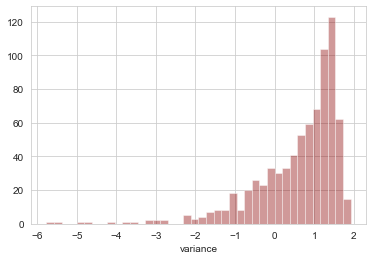

In [215]:
## distplot for variance
sns.distplot(bank['variance'],kde=False,color='darkred',bins=40)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='variance'>

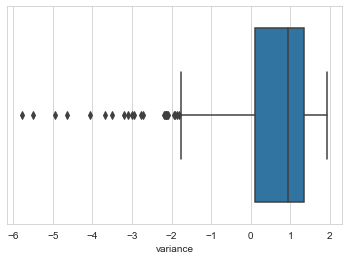

In [216]:
sns.boxplot(bank['variance'])

In [217]:
## Inter quartile range for skewness
IQR2=bank.variance.quantile(0.75)-bank.variance.quantile(0.25)
IQR2

1.2492265682627615

In [218]:
#### Extreme outliers
lower_bridge=bank['variance'].quantile(0.25)-(IQR2*3)
upper_bridge=bank['variance'].quantile(0.75)+(IQR2*3)
print(lower_bridge), print(upper_bridge)

-3.640002105625263
5.104583872214067


(None, None)

In [220]:
## removing outliers using lower_bridge, we place lower_bridge in place all outliers
bank.loc[bank['variance']<=-3.640002105625263,'variance']=-3.640002105625263

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='entropy'>

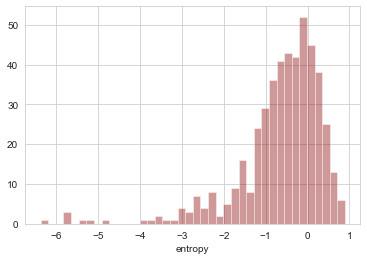

In [221]:
## distplot for entropy
sns.distplot(bank['entropy'],kde=False,color='darkred',bins=40)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='entropy'>

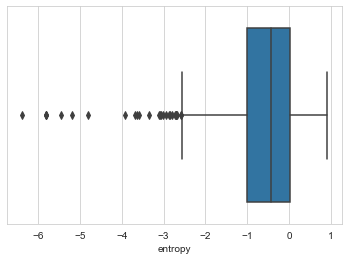

In [222]:
sns.boxplot(bank['entropy'])

In [223]:
IQR3=bank.entropy.quantile(0.75)-bank.entropy.quantile(0.25)
IQR3

1.0306988620758915

In [224]:
#### Extreme outliers
lower_bridge=bank['entropy'].quantile(0.25)-(IQR3*3)
upper_bridge=bank['entropy'].quantile(0.75)+(IQR3*3)
print(lower_bridge), print(upper_bridge)

-4.099762749192993
3.115129285338247


(None, None)

In [225]:
## removing outliers using lower_bridge, we place lower_bridge in place all outliers
bank.loc[bank['entropy']<=-4.099762749192993,'entropy']=-4.099762749192993

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='entropy'>

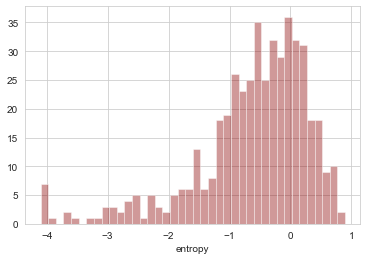

In [226]:
## entropy outliers has removed
sns.distplot(bank['entropy'],kde=False,color='darkred',bins=40)

## Feature selection

## set up target and feature data

In [227]:
### Independent and Dependent features
X=bank.iloc[:,0:4]
y=bank['class']

In [229]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

 ## which feature is importance with respect to class dependent variable

In [28]:
## find best features
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [29]:
print(model.feature_importances_)

[0.55263862 0.25777912 0.15072554 0.03885672]


# plot graph of feature importances for better visualization

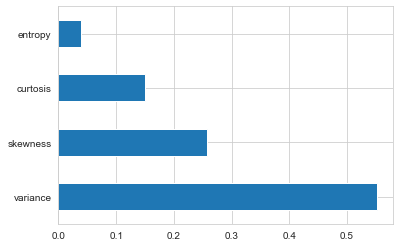

In [30]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [31]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
 #Randomized Search CV for selecting best hypermameter
import numpy as np

# No. of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# No of features take  at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 25, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15,20,50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5,7,9, 10]

In [39]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 9, 13, 17, 21, 25], 'min_samples_split': [2, 5, 10, 15, 20, 50, 100], 'min_samples_leaf': [1, 2, 5, 7, 9, 10]}


In [86]:
## for Diciontree classifier hyperparameter
## Hyper Parameter Optimization
param_dist = {"max_depth": [3, None],
              "max_features": ['auto', 'sqrt'],
              "min_samples_leaf": [1, 2, 5,7,9, 10],
              "criterion": ["gini", "entropy"]}

In [45]:
# for xgboost hyperparameter
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [48]:
# Use the random grid to search for best hyperparameters
## apply Random Forest classifier
## random forest model fitting on training data
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier()
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)


RandomForestClassifier()

In [79]:
# decision tree model fitting on training data
classifier2=DecisionTreeClassifier()
classifier2.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
import xgboost

In [52]:
# xgboost model fitting on training data
from xgboost import XGBClassifier
my_model=XGBClassifier()
classifier1=XGBClassifier()
classifier1.fit(X_train,y_train)

[23:33:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
# Random search of parameters, using 5 fold cross validation, for Decision tree
# search across 100 different combinations
rf_random_model1 = RandomizedSearchCV(estimator = classifier2, param_distributions = param_dist,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=41, n_jobs = 1)

In [56]:
# Random search of parameters, using 5 fold cross validation, for randomforest
# search across 100 different combinations
rf_random_model = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=41, n_jobs = 1)

In [55]:
# Random search of parameters, using 5 fold cross validation, for xgboost
# search across 100 different combinations
random_search=RandomizedSearchCV(classifier1,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [89]:
# random forest model using randomisedsearchcv fit the model on best hyperparameter
rf_random_model1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini 
[CV]  min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini, total=   0.0s
[CV] min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini 
[CV]  min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini, total=   0.0s
[CV] min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini 
[CV]  min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini, total=   0.0s
[CV] min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini 
[CV]  min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini, total=   0.0s
[CV] min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini 
[CV]  min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini, total=   0.0s
[CV] min_samples_leaf=10, max_features=sqrt, max_depth=None, criterion=entropy 
[CV]  min_samples_leaf=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  min_samples_leaf=1, max_features=auto, max_depth=None, criterion=entropy, total=   0.0s
[CV] min_samples_leaf=1, max_features=auto, max_depth=None, criterion=entropy 
[CV]  min_samples_leaf=1, max_features=auto, max_depth=None, criterion=entropy, total=   0.0s
[CV] min_samples_leaf=1, max_features=auto, max_depth=None, criterion=entropy 
[CV]  min_samples_leaf=1, max_features=auto, max_depth=None, criterion=entropy, total=   0.0s
[CV] min_samples_leaf=10, max_features=auto, max_depth=3, criterion=entropy 
[CV]  min_samples_leaf=10, max_features=auto, max_depth=3, criterion=entropy, total=   0.0s
[CV] min_samples_leaf=10, max_features=auto, max_depth=3, criterion=entropy 
[CV]  min_samples_leaf=10, max_features=auto, max_depth=3, criterion=entropy, total=   0.0s
[CV] min_samples_leaf=10, max_features=auto, max_depth=3, criterion=entropy 
[CV]  min_samples_leaf=10, max_features=auto, max_depth=3, criterion=entropy, total=   0.0s
[CV] min_samples_leaf=10, max_features=auto, max_dept

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7, 9,
                                                             10]},
                   random_state=41, scoring='neg_mean_squared_error',
                   verbose=2)

In [93]:
# random forest model using randomisedsearchcv fit the model on best hyperparameter
rf_random_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=9 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=9, total=   1.4s
[CV] n_estimators=500, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=9 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=9, total=   1.4s
[CV] n_estimators=500, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=9 
[CV]  n_estimators=500, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=9, total=   1.3s
[CV] n_estimators=500, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=9 
[CV]  n_estimators=500, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=9, total=   1.3s
[CV] n_estimators=500, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=9 
[CV]  n_estimators=500, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=9, total=   1.3s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=800, min_samples_split=2, m

[CV]  n_estimators=400, min_samples_split=20, min_samples_leaf=10, max_features=auto, max_depth=21, total=   1.1s
[CV] n_estimators=400, min_samples_split=20, min_samples_leaf=10, max_features=auto, max_depth=21 
[CV]  n_estimators=400, min_samples_split=20, min_samples_leaf=10, max_features=auto, max_depth=21, total=   1.1s
[CV] n_estimators=400, min_samples_split=20, min_samples_leaf=10, max_features=auto, max_depth=21 
[CV]  n_estimators=400, min_samples_split=20, min_samples_leaf=10, max_features=auto, max_depth=21, total=   1.1s
[CV] n_estimators=400, min_samples_split=20, min_samples_leaf=10, max_features=auto, max_depth=21 
[CV]  n_estimators=400, min_samples_split=20, min_samples_leaf=10, max_features=auto, max_depth=21, total=   1.2s
[CV] n_estimators=400, min_samples_split=20, min_samples_leaf=10, max_features=auto, max_depth=21 
[CV]  n_estimators=400, min_samples_split=20, min_samples_leaf=10, max_features=auto, max_depth=21, total=   1.1s
[CV] n_estimators=1100, min_sample

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 9, 13, 17, 21, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7, 9, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              50, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=41, scoring='neg_mean_squared_error',
                   verbose=2)

In [137]:
rf_random_model.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 21}

In [57]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[23:36:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.4s finished
F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_pa...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, sub

In [138]:
rf_random_model.best_score_

-0.010416666666666666

In [100]:
# predicted values for class using random forest
y_pred2=rf_random_model1.predict(X_test)
y_pred2

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [95]:
# predicted value for random forest
y_pred=rf_random_model.predict(X_test)
y_pred


array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

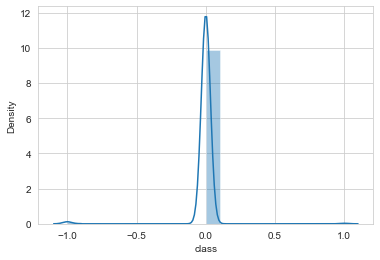

In [101]:
# check accuracy from graph for random forest
sns.distplot(y_test-y_pred2) 

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

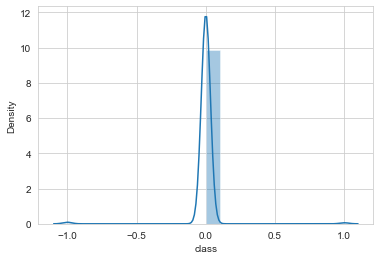

In [96]:
# check accuracy from graph for random forest
sns.distplot(y_test-y_pred) 

In [102]:

## accuracy for decision tree model
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,y_pred2)
accuracy


array([[228,   4],
       [  1, 179]], dtype=int64)

In [105]:
## accuracy score for decision tree model
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,y_pred2)
accuracy_score

0.9878640776699029

In [107]:
## classification report for decision tree
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       232
           1       0.98      0.99      0.99       180

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [97]:
## accuracy for random forest model

from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,y_pred)
accuracy

array([[229,   3],
       [  2, 178]], dtype=int64)

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

0.9878640776699029

## We can check precision,recall,f1-score using classification report!

In [155]:
## classification report for random forest
from sklearn.metrics import classification_report

In [157]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       232
           1       0.98      0.99      0.99       180

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [58]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [66]:
y_pred1=random_search.predict(X_test)
y_pred1

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

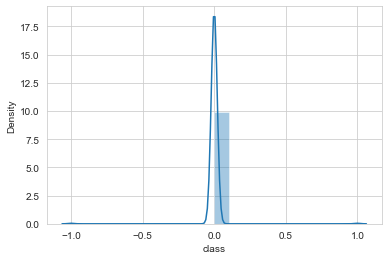

In [67]:
# check accuracy from graph
sns.distplot(y_test-y_pred1)

## xgboost accuracy

In [72]:
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,y_pred1)
accuracy

array([[231,   1],
       [  1, 179]], dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,y_pred1)
accuracy_score

0.9951456310679612

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       0.99      0.99      0.99       180

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



## Accuracy for decision tree model=0.9878640776699029
## Accuracy for random forest model=0.9878640776699029
## Accuracy for xgboost model=0.9951456310679612
## best performing model is xgboost

In [77]:
### Create a Pickle file using serialization 
### we select best model xgboost
import pickle
pickle_out = open("classifier1.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()